In [118]:
# 데이터 불러오기
from sklearn import datasets
raw_iris = datasets.load_iris()

import pandas as pd
X = pd.DataFrame(raw_iris.data, columns = raw_iris.feature_names)
y = pd.DataFrame(raw_iris.target, columns = ['class'])
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X,y,random_state=0)
# 데이터 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

In [119]:
# 잘 불러와졌나 확인할떈 shape로 확인
print(X.shape)
print(y.shape)

(150, 4)
(150, 1)


In [120]:
X # 네개의 피쳐값이 있음

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [121]:
X_tn_std

array([[ 1.54399532e-02, -1.19254753e-01,  2.25126850e-01,
         3.55797625e-01],
       [-9.98450310e-02, -1.04039491e+00,  1.13559562e-01,
        -2.98410911e-02],
       [ 1.05300481e+00, -1.19254753e-01,  9.50314227e-01,
         1.12707506e+00],
       [-1.36797986e+00,  3.41315328e-01, -1.39259884e+00,
        -1.31530348e+00],
       [ 1.16828980e+00,  1.11030287e-01,  7.27179649e-01,
         1.38416753e+00],
       [-1.02212490e+00,  1.03217045e+00, -1.22524790e+00,
        -8.01118523e-01],
       [-5.60984968e-01,  1.49274053e+00, -1.28103155e+00,
        -1.31530348e+00],
       [-1.02212490e+00, -2.42210516e+00, -1.65358660e-01,
        -2.86933568e-01],
       [ 7.07149859e-01, -1.19254753e-01,  9.50314227e-01,
         7.41436341e-01],
       [ 9.37719827e-01,  5.71600368e-01,  1.06188152e+00,
         1.64126001e+00],
       [ 1.30724937e-01, -1.96153508e+00,  6.71396005e-01,
         3.55797625e-01],
       [ 9.37719827e-01, -1.27067995e+00,  1.11766516e+00,
      

# 보팅

In [122]:
### 보팅
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

In [123]:
#첫번째모델
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf1

LogisticRegression(multi_class='multinomial', random_state=1)

In [124]:
clf2 = svm.SVC(kernel='linear', random_state=1)
clf2

SVC(kernel='linear', random_state=1)

In [125]:
clf3=GaussianNB()

In [126]:
#hard는 보팅에서 사용 다수결에서 
#soft도 있는데 그건 평균을 내서 사용 
clf_vote=VotingClassifier(estimators=[('lr',clf1),('svm',clf2),('gnb',clf3)],
voting='hard', weights=[1,1,1])

In [127]:
clf_vote.fit(X_tn_std,y_tn)

C:\Users\heysunn\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\heysunn\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='multinomial',
                                                 random_state=1)),
                             ('svm', SVC(kernel='linear', random_state=1)),
                             ('gnb', GaussianNB())],
                 weights=[1, 1, 1])

In [128]:
pred_vote = clf_vote.predict(X_te_std)
pred_vote

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [129]:
X_te_std.shape

(38, 4)

In [130]:
# 정확도
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_vote)
print(accuracy)

0.9736842105263158


In [131]:
# 클래스가 3개라 이렇게 나옴 
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_te, pred_vote)
conf_matrix

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [132]:
from sklearn.metrics import classification_report
class_report = classification_report(y_te,pred_vote)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



# 배깅

In [133]:
raw_wine = datasets.load_wine()
x= pd.DataFrame(raw_wine.data, columns = raw_wine.feature_names)
y= pd.DataFrame(raw_wine.target, columns=['class'])

In [134]:
x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [135]:
#트레이닝 / 테스트 데이터 분할
from sklearn.model_selection import train_test_split
x_tn, x_te, y_tn, y_te = train_test_split(x,y, random_state=0)


In [136]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(x_tn)
x_tn_std = std_scale.transform(x_tn)
x_te_std = std_scale.transform(x_te)

In [137]:
# 배깅이 적용된 모델이 랜덤포레스트이기 때문에 가우시안을 사용
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
clf_bagging = BaggingClassifier(base_estimator=GaussianNB(), n_estimators=10, random_state=0)
clf_bagging.fit(x_tn_std, y_tn)

C:\Users\heysunn\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=GaussianNB(), random_state=0)

In [138]:
#예측
pred_bagging = clf_bagging.predict(x_te_std)
print(pred_bagging)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 2 0 0 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [139]:
#정확도
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te,pred_bagging)
print(accuracy)

0.9555555555555556


In [140]:
# confusion matrix 확인
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te,pred_bagging)
print(conf_matrix)

[[16  0  0]
 [ 1 19  1]
 [ 0  0  8]]


In [141]:
# 분류 레포트 확인
from sklearn.metrics import classification_report
class_report = classification_report (y_te,pred_bagging)
print(class_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.90      0.95        21
           2       0.89      1.00      0.94         8

    accuracy                           0.96        45
   macro avg       0.94      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



# 랜덤포레스트 random forest

In [142]:
raw_wine = datasets.load_wine()
x= pd.DataFrame(raw_wine.data, columns = raw_wine.feature_names)
y= pd.DataFrame(raw_wine.target, columns=['class'])

In [143]:
#트레이닝 / 테스트 데이터 분할
from sklearn.model_selection import train_test_split
x_tn, x_te, y_tn, y_te = train_test_split(x,y, random_state=0)

In [144]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(x_tn)
x_tn_std = std_scale.transform(x_tn)
x_te_std = std_scale.transform(x_te)

In [145]:
# estimator : 갯수 
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=2, n_estimators=10000,random_state=1)
clf_rf.fit(x_tn_std, y_tn)

C:\Users\heysunn\AppData\Local\Temp\ipykernel_14448\101095166.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf.fit(x_tn_std, y_tn)


KeyboardInterrupt: 

In [ ]:
#예측
pred_rf = clf_rf.predict(x_te_std)
print(pred_rf)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 2 0 0 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [ ]:
#정확도
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te,pred_rf)
print(accuracy)

0.9555555555555556


In [ ]:
# confusion matrix 확인
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te,pred_rf)
print(conf_matrix)

[[16  0  0]
 [ 1 19  1]
 [ 0  0  8]]


In [ ]:
# 분류 레포트 확인
from sklearn.metrics import classification_report
class_report = classification_report (y_te,pred_rf)
print(class_report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.90      0.95        21
           2       0.89      1.00      0.94         8

    accuracy                           0.96        45
   macro avg       0.94      0.97      0.95        45
weighted avg       0.96      0.96      0.96        45



# Gradient boosting 그레디언트 부스팅

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
cancer = load_breast_cancer()
x=cancer.data
y=cancer.target


In [ ]:
x.shape

(569, 30)

In [ ]:
x_tn, x_te, y_tn, y_te = train_test_split(x,y, random_state=0)

In [ ]:
gbm = GradientBoostingClassifier(random_state=1)
gbm.fit(x_tn,y_tn)

GradientBoostingClassifier(random_state=1)

In [ ]:
# train accuracy
print(gbm.score(x_tn,y_tn))
# test accuracy
print(gbm.score(x_te,y_te).round(2))

1.0
0.97


In [ ]:
#max_depth
gbm = GradientBoostingClassifier(max_depth=1,random_state=1)
gbm.fit(x_tn,y_tn)

GradientBoostingClassifier(max_depth=1, random_state=1)

In [ ]:
# train accuracy
print(gbm.score(x_tn,y_tn).round(2))
# test accuracy
print(gbm.score(x_te,y_te).round(2))
# 정확도 약간 감소 맥스뎁스로

0.99
0.97


In [ ]:
#러닝레이트
gbm = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
gbm.fit(x_tn,y_tn)

GradientBoostingClassifier(learning_rate=0.01, random_state=1)

In [ ]:
# train accuracy
print(gbm.score(x_tn,y_tn).round(2))
# test accuracy
print(gbm.score(x_te,y_te).round(2))

0.99
0.96


# stacking 스태킹

In [ ]:
cancer = load_breast_cancer()
x=cancer.data
y=cancer.target

In [ ]:
x_tn, x_te, y_tn, y_te = train_test_split(x,y,test_size=0.3, random_state=0)

In [ ]:
std_scale=StandardScaler()
std_scale.fit(x_tn)
x_tn_std=std_scale.transform(x_tn)
x_te_std=std_scale.transform(x_te)

In [ ]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

clf1 = svm.SVC(kernel='linear',random_state=1) #model 1
clf2 = GaussianNB() #model 2
clf_stkg = StackingClassifier(estimators=[('svm',clf1),('gnb',clf2)],final_estimator=LogisticRegression()) #final model, stacking

clf_stkg.fit(x_tn,y_tn)

StackingClassifier(estimators=[('svm', SVC(kernel='linear', random_state=1)),
                               ('gnb', GaussianNB())],
                   final_estimator=LogisticRegression())

In [ ]:
pred_stkg=clf_stkg.predict(x_te_std)
pred_stkg.shape

(171,)

In [ ]:
class_report =classification_report(y_te,pred_stkg)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.02      0.03        63
           1       0.64      1.00      0.78       108

    accuracy                           0.64       171
   macro avg       0.82      0.51      0.40       171
weighted avg       0.77      0.64      0.50       171



# 딥러닝

In [155]:
# 경고(worning) 비표시
import warnings
warnings.filterwarnings('ignore')

In [168]:
import plotly.express as px
from datetime import datetime
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic')
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
mpl.rc('axes', unicode_minus=False)
%matplotlib inline

#행사구분데이터(입회비유무)
campaign_master=pd.read_csv('C:/alpa/최진영강사님/data/미니프로젝트/campaign_master.csv')
#18.04 부터 19.03까지 1년동안의 유저의 활동로그
use_log=pd.read_csv('C:/alpa/최진영강사님/data/미니프로젝트/use_log.csv')
#회원구분데이터 
class_master=pd.read_csv('C:/alpa/최진영강사님/data/미니프로젝트/class_master.csv')
#19년 3월 말 시점의 회원데이터
customer_master=pd.read_csv('C:/alpa/최진영강사님/data/미니프로젝트/customer_master.csv')
customer=pd.read_csv('C:/alpa/최진영강사님/data/미니프로젝트/customer_join.csv')



In [169]:
customer.isnull().sum()

customer_id             0
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
dtype: int64

In [170]:
customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


In [171]:
customer_clustering=customer[['mean','median','max','min','membership_period']]
customer_clustering.head()

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


In [172]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
customer_clustering_sc = sc.fit_transform(customer_clustering)
kmeans=KMeans(n_clusters=4,random_state=0)
clusters = kmeans.fit(customer_clustering_sc)
customer_clustering.loc[:,'cluster']=clusters.labels_
print(customer_clustering['cluster'].unique())
customer_clustering.head()

[2 0 3 1]


,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,2
1,5.083333,5.0,7,3,47,2
2,4.583333,5.0,6,3,47,2
3,4.833333,4.5,7,2,47,2
4,3.916667,4.0,6,1,47,2


In [173]:
customer_clustering.columns = ['월평균값','월중앙값','월최댓값','월최솟값','회원기간','cluster']
customer_clustering.groupby('cluster').count()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,1255,1255,1255,1255,1255
1,856,856,856,856,856
2,1093,1093,1093,1093,1093
3,988,988,988,988,988


In [174]:
customer_clustering.groupby('cluster').mean()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,3.711459,3.468924,6.244622,1.720319,8.079681
1,8.000136,7.960280,9.974299,6.099299,6.300234
2,4.627325,4.618024,7.183898,2.106130,38.343092
3,5.863162,5.865891,8.675101,3.104251,21.779352


In [175]:
from sklearn.decomposition import PCA
x= customer_clustering_sc
pca=PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)
pca_df=pd.DataFrame(x_pca)
pca_df['cluster']=customer_clustering['cluster']


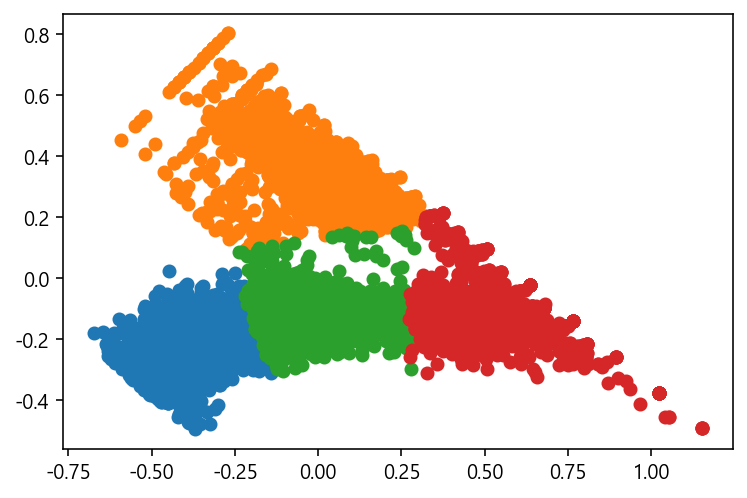

In [176]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in customer_clustering['cluster'].unique():
    tmp = pca_df.loc[pca_df['cluster']==i]
    plt.scatter(tmp[0],tmp[1])

In [154]:
customer_clustering = pd.concat([customer_clustering,customer],axis=1)
customer_clustering.groupby(['cluster','is_deleted'],as_index=False).count()[['cluster','is_deleted','customer_id']]

,cluster,is_deleted,customer_id
0,0,0,4
1,0,1,1251
2,1,0,799
3,1,1,57
4,2,0,1093
5,3,0,946
6,3,1,42


In [156]:
customer_clustering.groupby(['cluster','routine_flg'],as_index=False).count()[['cluster','routine_flg','customer_id']]

,cluster,routine_flg,customer_id
0,0,0,695
1,0,1,560
2,1,0,80
3,1,1,776
4,2,1,1093
5,3,0,4
6,3,1,984


In [157]:
use_log['usedate']=pd.to_datetime(use_log['usedate'])
use_log['연월']=use_log['usedate'].dt.strftime('%Y%m')
use_log_months = use_log.groupby(['연월','customer_id'],as_index=False).count()
use_log_months.rename(columns={'log_id':'count'},inplace=True)
del use_log_months['usedate']
use_log_months.head()


,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [161]:
use_log_pivot = pd.pivot_table(data=use_log_months, columns='연월',index='customer_id',values='count')
predict_data=pd.DataFrame()
total_month=len(use_log_pivot.columns)
used_month = 6
for i in range(total_month - used_month):
    selected_df = use_log_pivot.iloc[:,i:i+7]
    selected_df.columns = ['count1','count2','count3','count4','count5','count6','pred']
    predict_data=pd.concat([predict_data,selected_df])
predict_data = predict_data.dropna()
predict_data.head()

,count1,count2,count3,count4,count5,count6,pred
customer_id,,,,,,,
AS002855,4.0,5.0,5.0,5.0,3.0,7.0,3.0
AS009373,3.0,4.0,4.0,7.0,6.0,6.0,5.0
AS015315,6.0,3.0,3.0,6.0,3.0,7.0,4.0
AS015739,7.0,5.0,6.0,8.0,5.0,6.0,5.0
AS019860,6.0,8.0,6.0,4.0,7.0,5.0,7.0


In [162]:
predict_data=pd.merge(predict_data,customer[['customer_id','start_date']],on='customer_id',how='left')
predict_data.head()

,customer_id,count1,count2,count3,count4,count5,count6,pred,start_date
0,AS002855,4.0,5.0,5.0,5.0,3.0,7.0,3.0,2016-11-01
1,AS009373,3.0,4.0,4.0,7.0,6.0,6.0,5.0,2015-11-01
2,AS015315,6.0,3.0,3.0,6.0,3.0,7.0,4.0,2015-07-01
3,AS015739,7.0,5.0,6.0,8.0,5.0,6.0,5.0,2017-06-01
4,AS019860,6.0,8.0,6.0,4.0,7.0,5.0,7.0,2017-10-01


In [164]:
predict_data['current_date']='2019-04-09'
predict_data['current_date']=pd.to_datetime(predict_data['current_date'])
predict_data['start_date']=pd.to_datetime(predict_data['start_date'])
predict_data['period']=(predict_data['current_date'].dt.year - predict_data['start_date'].dt.year)*12 +(predict_data['current_date'].dt.year - predict_data['start_date'].dt.year)
predict_data.head()

,customer_id,count1,count2,count3,count4,count5,count6,pred,start_date,current_date,period
0,AS002855,4.0,5.0,5.0,5.0,3.0,7.0,3.0,2016-11-01,2019-04-09,39
1,AS009373,3.0,4.0,4.0,7.0,6.0,6.0,5.0,2015-11-01,2019-04-09,52
2,AS015315,6.0,3.0,3.0,6.0,3.0,7.0,4.0,2015-07-01,2019-04-09,52
3,AS015739,7.0,5.0,6.0,8.0,5.0,6.0,5.0,2017-06-01,2019-04-09,26
4,AS019860,6.0,8.0,6.0,4.0,7.0,5.0,7.0,2017-10-01,2019-04-09,26


In [166]:
from sklearn import linear_model
import sklearn.model_selection
model = linear_model.LinearRegression()

x = predict_data[['count1','count2','count3','count4','count5','count6','pred']]
y = predict_data['pred']
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y)
model.fit(x_train,y_train)

print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

1.0
1.0


In [167]:
coef = pd.DataFrame({'feature_names':x.columns,'coefficient':model.coef_})
coef

,feature_names,coefficient
0,count1,2.199682e-16
1,count2,-3.885781e-16
2,count3,6.106227e-16
3,count4,-5.967449e-16
4,count5,4.579670e-16
5,count6,3.608225e-16
6,pred,1.000000e+00
